<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/deep_sarsa_walkforward_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0 --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requireme

In [2]:
#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [3]:
#Clean install of TensorFlow compatible with Colab's GPU (CUDA 11.8 + cuDNN 8.x)
!pip install tensorflow==2.12.0

#Restart runtime after this!
!pip install numpy==1.24.4 --force-reinstall

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.3 MB/s eta 0:00:00
 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.4 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [1]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

#Version Checks
print(" Library Versions")
print("--------------------")
print(" PyTorch:", torch.__version__)
print(" CUDA:", torch.version.cuda)
print(" cuDF:", cudf.__version__)
print(" cuML:", cuml.__version__)
print(" Dask:", dask.__version__)
print(" Pandas:", pd.__version__)
print(" NumPy:", np.__version__)
print(" SciPy:", scipy.__version__)
print(" LightGBM:", lgb.__version__)
print(" Gymnasium:", gym.__version__)
print(" Stable Baselines3:", stable_baselines3.__version__)

#GPU Check (Torch + NVIDIA)
print("\n GPU Availability")
print("--------------------")
print(" PyTorch GPU Available:", torch.cuda.is_available())
print(" GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print(" GPU Name:", torch.cuda.get_device_name(0))

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


 Library Versions
--------------------
 PyTorch: 2.6.0+cu124
 CUDA: 12.4
 cuDF: 24.12.00
 cuML: 24.12.00
 Dask: 2024.11.2
 Pandas: 2.2.3
 NumPy: 1.24.4
 SciPy: 1.15.3
 LightGBM: 4.5.0
 Gymnasium: 1.1.1
 Stable Baselines3: 2.6.0

 GPU Availability
--------------------
 PyTorch GPU Available: False
 GPU Count: 0


In [4]:
#Clean install of TensorFlow compatible with Colab's GPU (CUDA 11.8 + cuDNN 8.x)
!pip uninstall -y tensorflow keras
!pip install tensorflow==2.12.0

#Restart runtime after this!
!pip install numpy==1.24.4 --force-reinstall

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-text 2.18.1 requires tenso

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: Operation cancelled by user
^C


In [1]:
#Core & System Utilities
import os
import gc
import sys
import time
import json
import pickle
import random
from datetime import datetime
from collections import defaultdict, deque

#Data Science Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba

#Financial Data
import yfinance as yf

#Machine Learning & Preprocessing
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)

#Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import Input, backend as K
from tensorflow.keras import mixed_precision

#Visualization & Display
import IPython.display as display

#RAPIDS Libraries (for GPU-accelerated ML, optional)
import cupy as cp

#Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

#Gym & Trading Environments
import gym
import gymnasium as gym
import gym_anytrading
from gym.spaces import Box
from gymnasium.spaces import Box as GymBox, Discrete
from gymnasium.wrappers import TimeLimit

#CUDA (Optional Paths - for manual GPU configuration)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

#GPU Check (Colab only)
!nvidia-smi


ImportError: Numba needs NumPy 1.24 or greater. Got NumPy 1.23.

In [2]:
#Required for TensorFlow compatibility (GPU + cuDNN)
!pip uninstall -y tensorflow keras -q
!pip install tensorflow==2.12.0 -q



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.


In [3]:
#Fix protobuf compatibility
!pip install protobuf==3.20.3 -q

#Essential packages
!pip install numpy==1.24.4 pandas joblib yfinance scikit-learn matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.30 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.30 which is incompatible.
grp

In [4]:
import os
from google.colab import drive

if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
else:
    print("ogle Drive is already mounted.")



Mounted at /content/drive


In [5]:
#Downgrade NumPy to a compatible version
!pip install numpy==1.24.4 --force-reinstall

#Reinstall LightGBM after fixing NumPy
!pip install lightgbm --force-reinstall --no-cache-dir


  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires tornado==6.4.2, but you have tornado 6.5.1 which is incompatible.
pylibcugraph-cu12 25.2.0 requires pylibraft-cu12==25.2.*, but you have pylibraft-cu12 24.12.0 which is incompatible.
pylibcugraph-cu12 25.2.0 requires rmm-cu12==25.2.*, but you have rmm-cu12 24

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
^C


In [1]:
!pip install -U scikit-learn==1.3.2 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 23.1 MB/s eta 0:00:00


In [2]:
!pip install yfinance

In [3]:
!rm -rf /content/drive

rm: cannot remove '/content/drive/.file-revisions-by-id': Operation canceled
rm: cannot remove '/content/drive/MyDrive': Operation canceled
rm: cannot remove '/content/drive/.shortcut-targets-by-id': Operation canceled
rm: cannot remove '/content/drive/.Trash-0': Directory not empty
rm: cannot remove '/content/drive/.Encrypted/MyDrive': Operation canceled
rm: cannot remove '/content/drive/.Encrypted/.shortcut-targets-by-id': Operation canceled



📈 Training AAPL | 2023-06-01 → 2025-04-28
✅ Saved: ./deep_sarsa_walkforward_models/deep_sarsa_AAPL_2023-06-01_to_2025-04-28.pth | Final: $156034.47

📈 Training TSLA | 2023-06-01 → 2025-04-28
✅ Saved: ./deep_sarsa_walkforward_models/deep_sarsa_TSLA_2023-06-01_to_2025-04-28.pth | Final: $375756.58

📈 Training MSFT | 2023-06-01 → 2025-04-28
✅ Saved: ./deep_sarsa_walkforward_models/deep_sarsa_MSFT_2023-06-01_to_2025-04-28.pth | Final: $76367.06

📈 Training GOOG | 2023-06-01 → 2025-04-28
✅ Saved: ./deep_sarsa_walkforward_models/deep_sarsa_GOOG_2023-06-01_to_2025-04-28.pth | Final: $82158.51

📈 Training AMZN | 2023-06-01 → 2025-04-28
✅ Saved: ./deep_sarsa_walkforward_models/deep_sarsa_AMZN_2023-06-01_to_2025-04-28.pth | Final: $122397.45

📈 Training NVDA | 2023-06-01 → 2025-04-28
✅ Saved: ./deep_sarsa_walkforward_models/deep_sarsa_NVDA_2023-06-01_to_2025-04-28.pth | Final: $101394.66

📈 Training META | 2023-06-01 → 2025-04-28
✅ Saved: ./deep_sarsa_walkforward_models/deep_sarsa_META_2023-06-

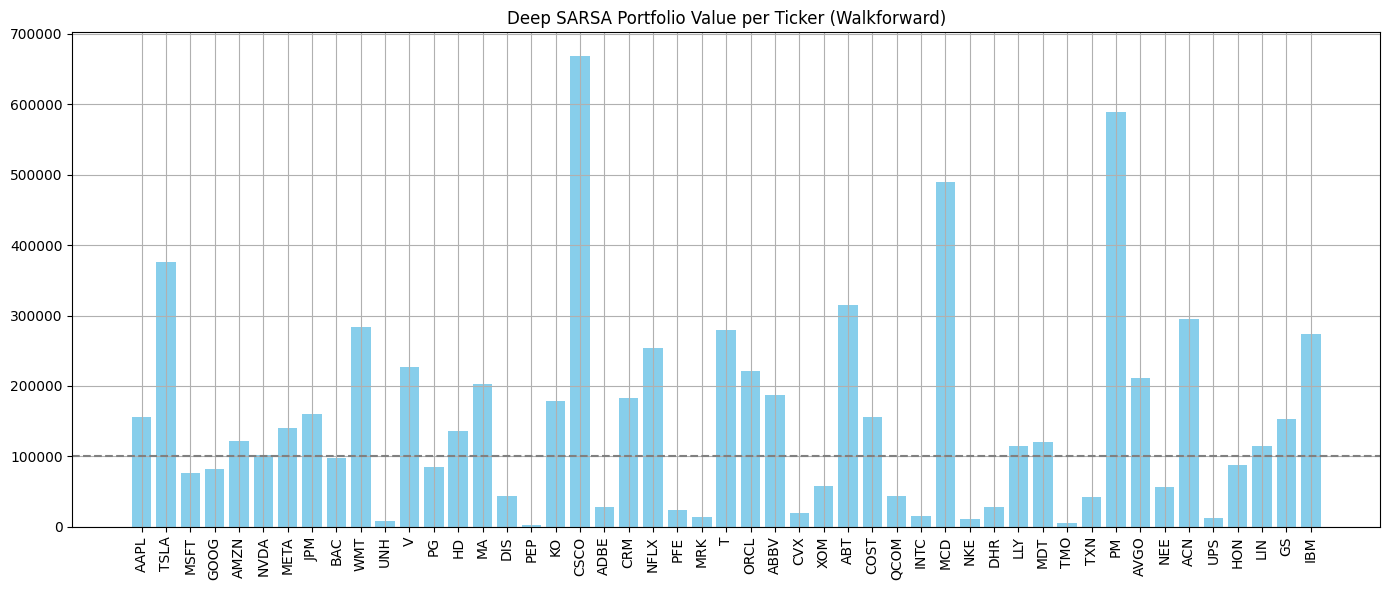

In [13]:
# === Imports ===
import os, gc, random
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# === Config ===
TICKERS = [
    "AAPL", "TSLA", "MSFT", "GOOG", "AMZN", "NVDA", "META", "JPM", "BAC", "WMT",
    "UNH", "V", "PG", "HD", "MA", "DIS", "PEP", "KO", "CSCO", "ADBE", "CRM", "NFLX",
    "PFE", "MRK", "T", "ORCL", "ABBV", "CVX", "XOM", "ABT", "COST", "QCOM", "INTC",
    "MCD", "NKE", "DHR", "LLY", "MDT", "TMO", "TXN", "PM", "AVGO", "NEE", "ACN", "UPS",
    "HON", "LIN", "GS", "IBM"
]
SEQUENCE_LENGTH = 60
SAVE_DIR = "./deep_sarsa_walkforward_models"
os.makedirs(SAVE_DIR, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Feature Engineering ===
def compute_technical_indicators(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Signal_Line'] = df['MACD'].ewm(span=9).mean()
    df['ATR'] = df['High'].rolling(14).max() - df['Low'].rolling(14).min()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    df.dropna(inplace=True)
    return df

# === Deep SARSA Model ===
class DQNNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, 64, batch_first=True)
        self.fc1 = nn.Linear(64, 32)
        self.out = nn.Linear(32, output_dim)

    def forward(self, x):
        h, _ = self.lstm(x)
        h = h[:, -1, :]
        x = torch.relu(self.fc1(h))
        return self.out(x)

class DeepSARSAAgent:
    def __init__(self, input_dim, action_dim, lr=1e-3, gamma=0.99):
        self.gamma = gamma
        self.model = DQNNet(input_dim, action_dim).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = nn.MSELoss()

    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            return random.randint(0, 2)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def update(self, state, action, reward, next_state, next_action, done):
        q_values = self.model(state)
        next_q_values = self.model(next_state)
        target = reward + self.gamma * next_q_values[0, next_action] * (1 - int(done))
        loss = self.criterion(q_values[0, action], target.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# === Train and Evaluate Agent ===
def train_agent_on_split(train_X, test_X, episodes=5):
    agent = DeepSARSAAgent(train_X.shape[2], 3)
    for ep in range(episodes):
        idx = random.randint(0, len(train_X) - 2)
        state = torch.tensor(train_X[idx][None], dtype=torch.float32).to(device)
        action = agent.select_action(state, epsilon=1.0 - ep / episodes)
        for t in range(idx, len(train_X) - 1):
            next_state = torch.tensor(train_X[t+1][None], dtype=torch.float32).to(device)
            reward = float(train_X[t+1, -1, 0] - train_X[t, -1, 0])
            done = t + 2 == len(train_X)
            next_action = agent.select_action(next_state, epsilon=1.0 - ep / episodes)
            agent.update(state, action, reward, next_state, next_action, done)
            if done: break
            state, action = next_state, next_action

    # === Inference and Metrics ===
    returns, actions, labels = [], [], []
    for t in range(len(test_X) - 1):
        state = torch.tensor(test_X[t][None], dtype=torch.float32).to(device)
        action = agent.select_action(state, epsilon=0.0)
        actions.append(action)

        current_price = test_X[t, -1, 0]
        next_price = test_X[t+1, -1, 0]
        pct_return = (next_price - current_price) / (current_price + 1e-6)
        returns.append(pct_return)

        if next_price > current_price:
            labels.append(2)  # Buy
        elif next_price < current_price:
            labels.append(0)  # Sell
        else:
            labels.append(1)  # Hold

    test_returns = np.array(returns)
    cumulative = np.cumprod(1 + test_returns)
    final_value = 100000 * cumulative[-1]
    return_pct = cumulative[-1] - 1

    sharpe = test_returns.mean() / (test_returns.std() + 1e-6) * np.sqrt(252)
    drawdown = np.max(np.maximum.accumulate(cumulative) - cumulative)
    accuracy = np.mean(np.array(actions) == np.array(labels))

    return {
        "Sharpe": round(sharpe, 4),
        "Accuracy": round(accuracy, 4),
        "Drawdown": round(drawdown, 4),
        "Return": round(return_pct * 100, 2),
        "Final_Portfolio": round(final_value, 2),
    }, agent

# === Walkforward Training Loop ===
train_start = "2023-06-01"
train_end = "2024-06-01"
test_start = "2024-06-01"
test_end = "2025-04-28"

def date_based_walkforward_train(ticker):
    print(f"\n📈 Training {ticker} | {train_start} → {test_end}")
    df = yf.download(ticker, start=train_start, end=test_end, interval="1h", progress=False)
    if df.empty:
        print(f"⚠️ {ticker}: No data.")
        return None

    df = compute_technical_indicators(df)
    features = ['Close', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'Signal_Line', 'ATR', 'OBV']
    scaled = MinMaxScaler().fit_transform(df[features])
    df_scaled = pd.DataFrame(scaled, index=df.index, columns=features)

    sequences = [(df_scaled.index[i], df_scaled.iloc[i - SEQUENCE_LENGTH:i].values)
                 for i in range(SEQUENCE_LENGTH, len(df_scaled))]

    train_X = np.array([x[1] for x in sequences if train_start <= x[0].strftime('%Y-%m-%d') < train_end])
    test_X = np.array([x[1] for x in sequences if test_start <= x[0].strftime('%Y-%m-%d') < test_end])

    if len(train_X) < 10 or len(test_X) < 10:
        print(f"⚠️ {ticker}: Insufficient data.")
        return None

    metrics, agent = train_agent_on_split(train_X, test_X)
    model_path = f"{SAVE_DIR}/deep_sarsa_{ticker}_{train_start}_to_{test_end}.pth"
    torch.save(agent.model.state_dict(), model_path)
    print(f"✅ Saved: {model_path} | Final: ${metrics['Final_Portfolio']:.2f}")
    metrics["Ticker"] = ticker
    return metrics

# === Run and Collect All Results ===
results = []
for ticker in TICKERS:
    metrics = date_based_walkforward_train(ticker)
    if metrics:
        results.append(metrics)
    gc.collect()
    torch.cuda.empty_cache()

# === Convert and Save Full Metrics ===
df = pd.DataFrame(results)

# ✅ Save full metrics to model selector CSV (Google Drive or local)
df.to_csv("/content/drive/MyDrive/results/kmeans_walkforward/deep_sarsa_model_selection.csv", index=False)

# ✅ Also sort and save portfolio summary for plotting
df_sorted = df.sort_values("Final_Portfolio", ascending=False)
df_sorted.to_csv("results/sarsa_walkforward_summary.csv", index=False)

# === Optional: Display top 5
print("\nTop 5 by Portfolio Value:")
print(df_sorted[["Sharpe", "Accuracy", "Drawdown", "Return", "Final_Portfolio", "Ticker"]].head())

# === Summary Output ===
print("\n🏆 Top 5 by Portfolio Value:")
print(df.head())

print("\n🔻 Bottom 5 by Portfolio Value:")
print(df.tail())

# === Plotting ===
plt.figure(figsize=(14, 6))
plt.bar(df["Ticker"], df["Final_Portfolio"], color='skyblue')
plt.axhline(100000, linestyle='--', color='gray')
plt.title("Deep SARSA Portfolio Value per Ticker (Walkforward)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()
